In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': plt.rcParams['font.size'] + 2})


In [2]:
SRCNN_batchsize8 = pd.read_csv("srcnn_model_default_24h_batchsize8_samplesall_normalized.csv")
SRCNN_batchsize16 = pd.read_csv("srcnn_model_default_24h_batchsize16_samplesall_normalized.csv")
SRCNN_batchsize32 = pd.read_csv("srcnn_model_default_24h_batchsize32_samplesall_normalized.csv")
SRCNN_batchsize64 = pd.read_csv("srcnn_model_default_24h_batchsize64_samplesall_normalized.csv")

SRCNN_L4 = pd.read_csv("srcnn_model_L4_24h_batchsize8_samplesall_normalized.csv")
SRCNN_W128 = pd.read_csv("srcnn_model_W128_24h_batchsize8_samplesall_normalized.csv")
SRCNN_W256 = pd.read_csv("srcnn_model_W256_24h_batchsize8_samplesall_normalized.csv")

SRCNN_K3 = pd.read_csv("srcnn_model_K3_24h_batchsize8_samplesall_normalized.csv")
SRCNN_K5 = pd.read_csv("srcnn_model_K5_24h_batchsize8_samplesall_normalized.csv")


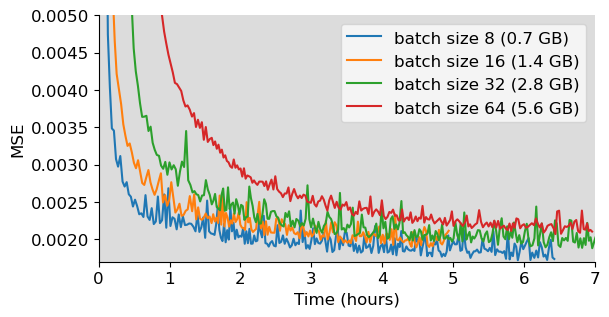

In [3]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

ax.set_facecolor("gainsboro")  

ax.plot(SRCNN_batchsize8['elapsed_time_sec'] / 60 / 60, SRCNN_batchsize8['val_loss'], label=f"batch size 8 ({SRCNN_batchsize8['max_memory_GiB'][0]:.1f} GB)")
ax.plot(SRCNN_batchsize16['elapsed_time_sec'] / 60 / 60, SRCNN_batchsize16['val_loss'], label=f"batch size 16 ({SRCNN_batchsize16['max_memory_GiB'][0]:.1f} GB)")
ax.plot(SRCNN_batchsize32['elapsed_time_sec'] / 60 / 60, SRCNN_batchsize32['val_loss'], label=f"batch size 32 ({SRCNN_batchsize32['max_memory_GiB'][0]:.1f} GB)")
ax.plot(SRCNN_batchsize64['elapsed_time_sec'] / 60 / 60, SRCNN_batchsize64['val_loss'], label=f"batch size 64 ({SRCNN_batchsize64['max_memory_GiB'][0]:.1f} GB)")

plt.ylim(00.0017,0.005)
plt.xlim(0,7)
plt.xlabel('Time (hours)')
plt.ylabel('MSE')
plt.legend(framealpha=0.7)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)

plt.savefig("../../final_figures/srcnn_batchsize.pdf", bbox_inches="tight")
plt.savefig("../../final_figures/srcnn_batchsize.png", bbox_inches="tight")
plt.show()

Small batch size of 8 is best

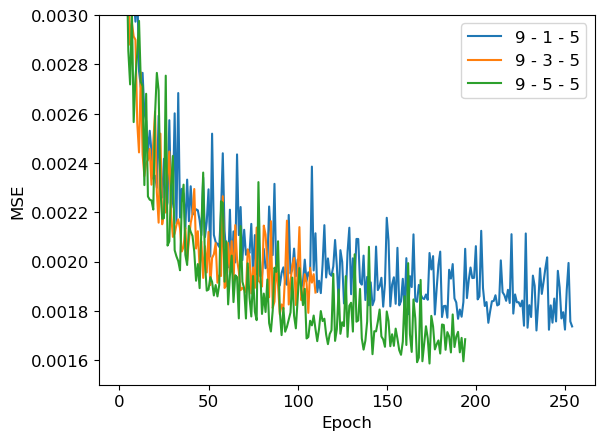

In [4]:
plt.plot(SRCNN_batchsize8['epoch'], SRCNN_batchsize8['val_loss'], label="9 - 1 - 5")
plt.plot(SRCNN_K3['epoch'], SRCNN_K3['val_loss'], label="9 - 3 - 5")
plt.plot(SRCNN_K5['epoch'], SRCNN_K5['val_loss'], label="9 - 5 - 5")
plt.ylim(00.0015,0.003)
# plt.xlim(0,6.5)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig("../srcnn_figures/srcnn_kernels.png", bbox_inches="tight")

plt.show()

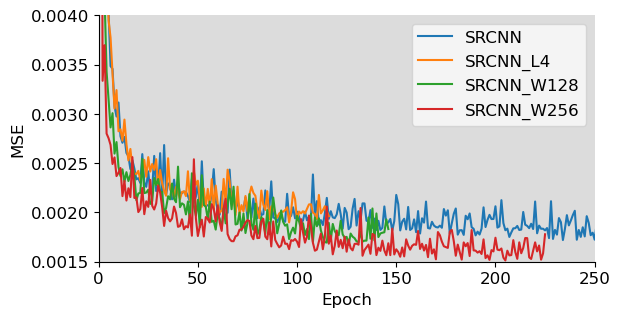

In [5]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

ax.set_facecolor("gainsboro")  

ax.plot(SRCNN_batchsize8['epoch'], SRCNN_batchsize8['val_loss'], label=f"SRCNN")
ax.plot(SRCNN_L4['epoch'], SRCNN_L4['val_loss'], label=f"SRCNN_L4")
ax.plot(SRCNN_W128['epoch'], SRCNN_W128['val_loss'], label=f"SRCNN_W128")
ax.plot(SRCNN_W256['epoch'], SRCNN_W256['val_loss'], label=f"SRCNN_W256")

plt.ylim(00.0015,0.004)
plt.xlim(0,250)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(framealpha=0.7)

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)

plt.savefig("../../final_figures/srcnn_depth_and_width.pdf", bbox_inches="tight")
plt.savefig("../../final_figures/srcnn_depth_and_width.png", bbox_inches="tight")

plt.show()